# Imports and Installations

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers
!pip install pyts

     |████████████████████████████████| 4.0 MB 8.4 MB/s 
     |████████████████████████████████| 596 kB 55.2 MB/s 
     |████████████████████████████████| 77 kB 7.9 MB/s 
     |████████████████████████████████| 880 kB 63.9 MB/s 
     |████████████████████████████████| 6.6 MB 46.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=bfe27fbed2fd896ec078d8e4cb89c4b3a0a816ffa0b57ae3851e8770f2c2f378
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 2.5 MB 7.8 MB/s 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
plt.style.use("ggplot")

from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

from pyts.transformation import ShapeletTransform
from sklearn.neighbors import KNeighborsClassifier

import requests
import tensorflow as tf

In [4]:
#train_path = "/content/drive/MyDrive/AI Year 3/Coursework/mitbih_train.csv"
#test_path = "/content/drive/MyDrive/AI Year 3/Coursework/mitbih_test.csv"

train_path = "/content/drive/MyDrive/Coursework/mitbih_train.csv"
test_path = "/content/drive/MyDrive/Coursework/mitbih_test.csv"

train_df = pd.read_csv(train_path, header = None)
test_df = pd.read_csv(test_path, header = None)



# Data Augmentation and Resampling

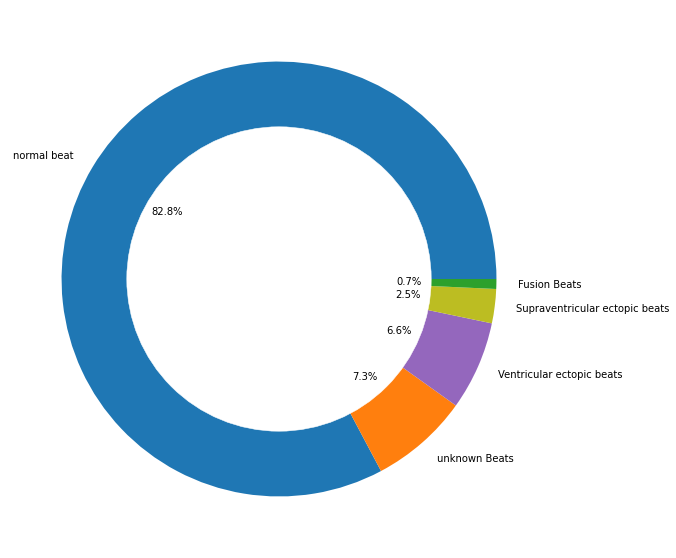

In [5]:
# representation of classes % wise
per_class = train_df[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### DATA AUGMENTATION

In [6]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

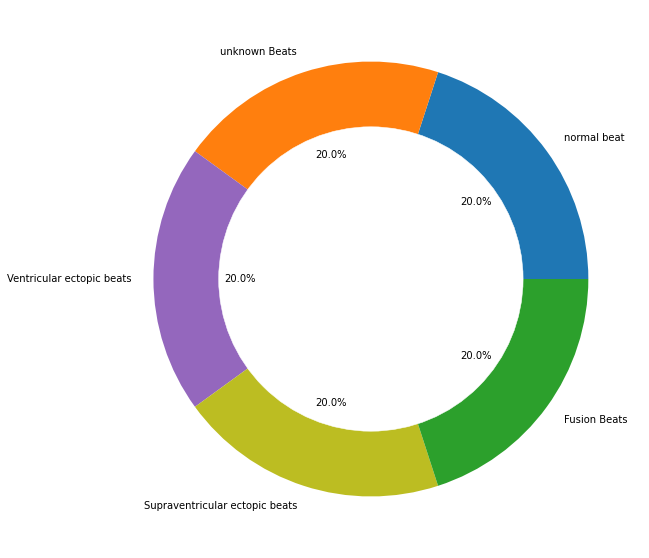

In [7]:
# representation of classes % wise
per_class = train_df[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [8]:
classes=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [9]:
classes

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
34127,0.982249,0.766272,0.068047,0.050296,0.103550,0.079882,0.091716,0.082840,0.085799,0.071006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72782,0.956349,0.853175,0.218254,0.000000,0.079365,0.119048,0.099206,0.138889,0.158730,0.134921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75315,0.822547,0.891441,0.843424,0.805845,0.757829,0.743215,0.774530,0.686848,0.440501,0.233820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
80713,0.613757,0.619048,0.706349,0.777778,0.817460,0.825397,0.822751,0.828042,0.846561,0.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
85958,0.680441,0.460055,0.435262,0.399449,0.371901,0.319559,0.297521,0.245179,0.201102,0.093664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


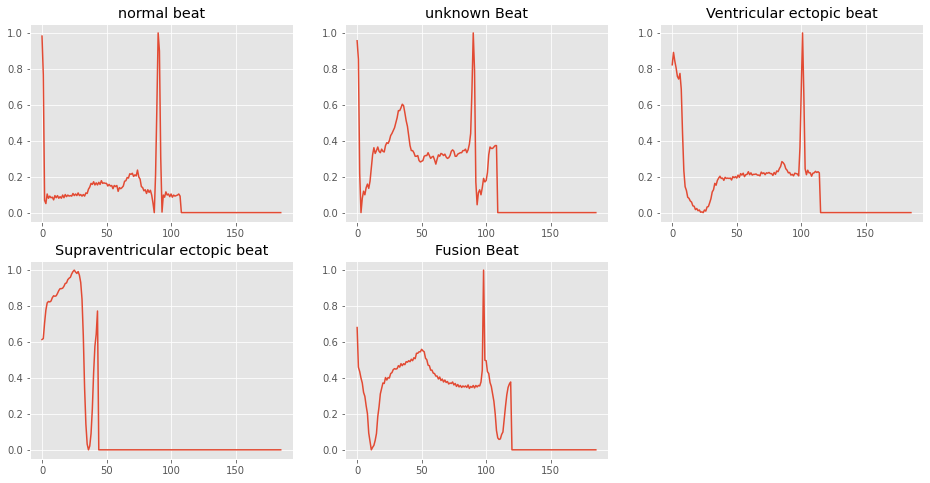

In [10]:
# plotting classes ECG
plt.figure(figsize=(16,8))
# normal
plt.subplot(2, 3, 1)  
plt.plot(classes.iloc[0,:186])
plt.title('normal beat')
# unknown
plt.subplot(2, 3, 2)  
plt.plot(classes.iloc[1,:186])
plt.title('unknown Beat')
# veb
plt.subplot(2, 3, 3)  
plt.plot(classes.iloc[2,:186])
plt.title('Ventricular ectopic beat')
# seb
plt.subplot(2, 3, 4)  
plt.plot(classes.iloc[3,:186])
plt.title('Supraventricular ectopic beat')
# fusion
plt.subplot(2, 3, 5)  
plt.plot(classes.iloc[4,:186])
plt.title('Fusion Beat')
# show plot
plt.show()

In [11]:
def plot_hist(class_number,ma,mi):
    # get the class data
    img=train_df.loc[train_df[187]==class_number].values
    # crop it
    img=img[:,mi:ma]
    # creates a continous steam of data
    img_flatten=img.flatten()
    final1=list(range(mi,ma))*(img.shape[0])
    print(img.shape[0])
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(ma-mi,ma-mi),cmap=plt.cm.jet)
    plt.show()

20000
1300000
1300000


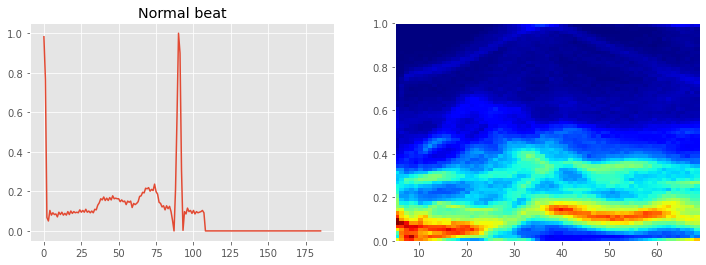

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)  
plt.plot(classes.iloc[0,:186])
plt.title('Normal beat')
plt.subplot(1, 2, 2)  
plot_hist(0,70,5)

### Adding Guassian Noise

In [13]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

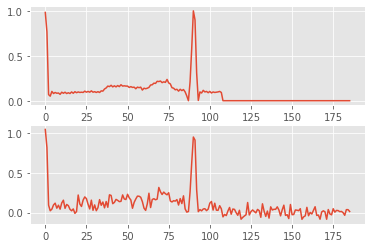

In [14]:
tempo=classes.iloc[0,:186]
#print(tempo)
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(classes.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [15]:
target_train=train_df[187]
target_test=test_df[187]
y_train=tf.keras.utils.to_categorical(target_train)
y_test=tf.keras.utils.to_categorical(target_test)

In [16]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
#for i in range(len(X_train)):
#    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [17]:
print(X_train.shape)
print(y_train.shape)

(100000, 186, 1)
(100000, 5)


# Clustering of Data

## Label Processing for Clustering

In [18]:
X_train.shape

(100000, 186, 1)

In [19]:
randomRows = np.random.randint(len(X_train), size=int(len(X_train)/10))
newarr=[]
for i in randomRows:
    newarr.append(X_train[i])

clust_xtrain = np.asarray(newarr)

In [20]:
clust_xtrain.shape

(10000, 186, 1)

In [ ]:
#shapelet = ShapeletTransform(window_sizes=np.arange(10, 186, 1), random_state=42)

In [21]:
nsamples, nx, ny = clust_xtrain.shape
clust_xtrain2 = clust_xtrain.reshape((nsamples,nx*ny))

In [22]:
clust_xtrain2.shape

(10000, 186)

In [23]:
print(clust_xtrain.shape)

(10000, 186, 1)


In [20]:
#nsamples, nx, ny = X_test.shape
#d2_X_test_dataset = X_test.reshape((nsamples,nx*ny))

## Deciding Number of Clusters using Silhouette Score and Davies-Bouldin Index

Experiments: Do Not Need to Run

### K-Means


range(6, 21)


100%|██████████| 15/15 [01:34<00:00,  6.33s/it]


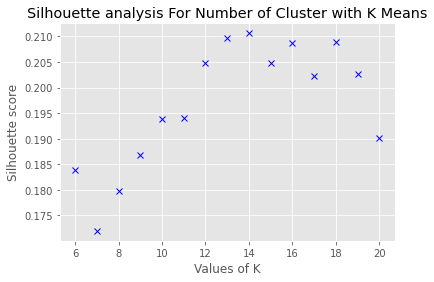

In [55]:
from sklearn.metrics import silhouette_score

silhouette_avg = []

K = range(6,21)

print(K)
for num_clusters in tqdm(K):
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(clust_xtrain2)
  cluster_labels = kmeans.labels_
  #silhouette_avg.append(silhouette_score(clust_xtrain2, cluster_labels))
  score = silhouette_score(clust_xtrain2, cluster_labels)
  plt.plot(num_clusters,score,'bx-')

plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Number of Cluster with K Means")
plt.show()

range(6, 21)


100%|██████████| 15/15 [01:05<00:00,  4.38s/it]


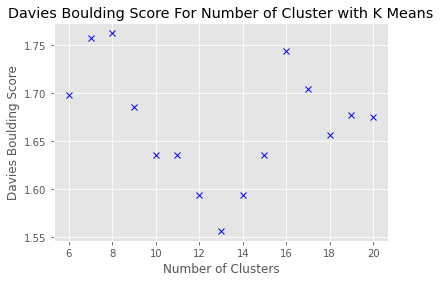

In [54]:
from sklearn.metrics import davies_bouldin_score

K = range(6,21)

print(K)
for num_clusters in tqdm(K):
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(clust_xtrain2)
  cluster_labels = kmeans.labels_
  #silhouette_avg.append(silhouette_score(clust_xtrain2, cluster_labels))
  score = davies_bouldin_score(clust_xtrain2, cluster_labels)
  plt.plot(num_clusters,score,'bx-')

plt.xlabel("Number of Clusters") 
plt.ylabel("Davies Boulding Score") 
plt.title("Davies Boulding Score For Number of Cluster with K Means")
plt.show()

### Ward Hierachical

range(6, 25)


100%|██████████| 19/19 [03:21<00:00, 10.60s/it]


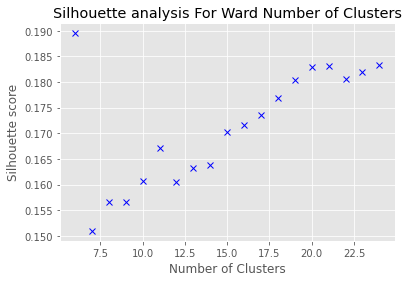

In [66]:
from sklearn.metrics import silhouette_score


K = range(6,25)

for num_clusters in tqdm(K):
  ward = AgglomerativeClustering(n_clusters=num_clusters)
  ward.fit(clust_xtrain2)
  cluster_labels = ward.labels_
  #silhouette_avg.append(silhouette_score(clust_xtrain2, cluster_labels))
  sil_score = silhouette_score(clust_xtrain2, cluster_labels)
  #db_score = davies_bouldin_score(clust_xtrain2, cluster_labels)
  plt.plot(num_clusters,sil_score,'bx-')
  #axs[1].plot(num_clusters,db_score,'bx-')

plt.xlabel("Number of Clusters") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Ward Number of Clusters")
plt.show()

#Davies-Bouldin
#axs[1].xlabel("Number of Clusters") 
#axs[1].ylabel("Davies-Bouldin score") 
#axs[1].title("Davies-Bouldin analysis For Ward Number of Clusters")
#axs[1].show()


In [67]:
from sklearn.metrics import davies_bouldin_score

100%|██████████| 19/19 [02:55<00:00,  9.24s/it]


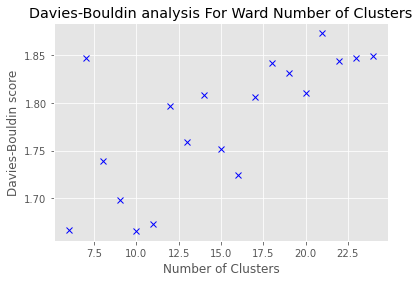

In [68]:
K = range(6,25)

for num_clusters in tqdm(K):
  ward = AgglomerativeClustering(n_clusters=num_clusters)
  ward.fit(clust_xtrain2)
  cluster_labels = ward.labels_
  db_score = davies_bouldin_score(clust_xtrain2, cluster_labels)
  #plt.plot(num_clusters,sil_score,'bx-')
  plt.plot(num_clusters,db_score,'bx-')

#plt.xlabel("Number of Clusters") 
#plt.ylabel("Silhouette score") 
#plt.title("Silhouette analysis For Ward Number of Clusters")
#plt.show()

#Davies-Bouldin
plt.xlabel("Number of Clusters") 
plt.ylabel("Davies-Bouldin score") 
plt.title("Davies-Bouldin analysis For Ward Number of Clusters")
plt.show()

### Spectral

100%|██████████| 19/19 [16:02<00:00, 50.66s/it]


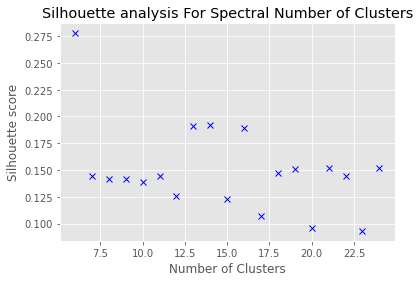

In [71]:
from sklearn.metrics import silhouette_score

K = range(6,25)

for num_clusters in tqdm(K):
  spectral = SpectralClustering(n_clusters=num_clusters)
  spectral.fit(clust_xtrain2)
  cluster_labels = spectral.labels_
  #silhouette_avg.append(silhouette_score(clust_xtrain2, cluster_labels))
  sil_score = silhouette_score(clust_xtrain2, cluster_labels)
  #db_score = davies_bouldin_score(clust_xtrain2, cluster_labels)
  plt.plot(num_clusters,sil_score,'bx-')
  #axs[1].plot(num_clusters,db_score,'bx-')

plt.xlabel("Number of Clusters") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Spectral Number of Clusters")
plt.show()

100%|██████████| 19/19 [11:58<00:00, 37.80s/it]


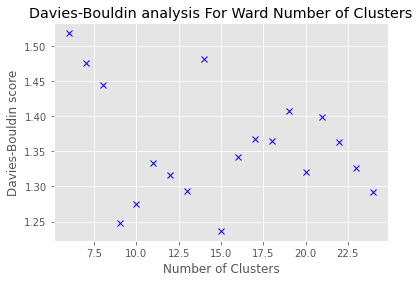

In [129]:
K = range(6,25)

for num_clusters in tqdm(K):
  spectral = SpectralClustering(n_clusters=num_clusters)
  spectral.fit(clust_xtrain2)
  cluster_labels = spectral.labels_
  db_score = davies_bouldin_score(clust_xtrain2, cluster_labels)
  #plt.plot(num_clusters,sil_score,'bx-')
  plt.plot(num_clusters,db_score,'bx-')

#plt.xlabel("Number of Clusters") 
#plt.ylabel("Silhouette score") 
#plt.title("Silhouette analysis For Ward Number of Clusters")
#plt.show()

#Davies-Bouldin
plt.xlabel("Number of Clusters") 
plt.ylabel("Davies-Bouldin score") 
plt.title("Davies-Bouldin analysis For Ward Number of Clusters")
plt.show()

## K-Means Clustering 

Best Performing Clustering Algorithm
--- Run only this

In [72]:
NUM_CLUSTERS = 13

In [73]:
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=0).fit(clust_xtrain2)

In [21]:
print(kmeans.labels_.shape)

(10000,)


In [74]:
unlablled_labels = kmeans.labels_

## Ward Hierarchical Clustering

In [ ]:
NUM_CLUSTERS = 6

In [30]:
ward = AgglomerativeClustering(n_clusters=10).fit(clust_xtrain2)

In [31]:
print(ward.labels_.shape)

(10000,)


In [32]:
unlablled_labels = ward.labels_

## Spectral Clustering

In [ ]:
NUM_CLUSTERS = 13

In [89]:
spectral = SpectralClustering(n_clusters = 10).fit(clust_xtrain2)

In [90]:
print(spectral.labels_.shape)

(10000,)


In [ ]:
unlablled_labels = spectral.labels_

## Label Processing for models

In [75]:
cat_unlabel = tf.keras.utils.to_categorical(
    unlablled_labels, num_classes=NUM_CLUSTERS, dtype='float32'
)

In [76]:
cat_unlabel.shape
print(cat_unlabel[:5])
print(unlablled_labels[:5])


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[10  9 11 10  5]


In [77]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Conv1D, MaxPool1D, Flatten, Dropout, BatchNormalization
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


# Bi-LSTM Model Semi Supervised

In [78]:
model_LSTM_core = Sequential()
model_LSTM_core.add(Bidirectional(LSTM(units= 100)))
model_LSTM_core.add(Dropout(0.3))
#model_LSTM_core.add(Dense(20, activation = 'relu'))




In [80]:
from keras import activations
from keras.layers.normalization.batch_normalization import BatchNormalization
model_unsup = Sequential()

model_unsup.add(keras.Input(shape=(X_train.shape[1],1)))
model_unsup.add(model_LSTM_core)
model_unsup.add(Dense(20, activation = 'relu'))
model_unsup.add(Dense(NUM_CLUSTERS, activation='softmax'))
model_unsup.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_unsup.build(input_shape= (10000,186,1))


In [81]:
print(X_train.shape)
print(clust_xtrain.shape)

(100000, 186, 1)
(10000, 186, 1)


In [82]:
model_unsup.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200)               81600     
                                                                 
 dense_2 (Dense)             (None, 20)                4020      
                                                                 
 dense_3 (Dense)             (None, 13)                273       
                                                                 
Total params: 85,893
Trainable params: 85,893
Non-trainable params: 0
_________________________________________________________________


In [109]:
print(X_train.shape)
print(cat_unlabel.shape)
print(X_test.shape)
print(y_test.shape)

(100000, 186, 1)
(10000, 10)
(21892, 186, 1)
(21892, 5)


In [84]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    #tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    #tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [85]:
history=model_unsup.fit(clust_xtrain, cat_unlabel, 
                        validation_split=0.2, 
                        batch_size=256, 
                        epochs = 30, 
                        callbacks = my_callbacks)

Epoch 1/30
32/32 [==============================] - 12s 80ms/step - loss: 2.4706 - accuracy: 0.1521 - val_loss: 2.2777 - val_accuracy: 0.2415
Epoch 2/30
32/32 [==============================] - 1s 38ms/step - loss: 2.0521 - accuracy: 0.2606 - val_loss: 1.7655 - val_accuracy: 0.3895
Epoch 3/30
32/32 [==============================] - 1s 38ms/step - loss: 1.6536 - accuracy: 0.3829 - val_loss: 1.6632 - val_accuracy: 0.3545
Epoch 4/30
32/32 [==============================] - 1s 38ms/step - loss: 1.3458 - accuracy: 0.4829 - val_loss: 1.1458 - val_accuracy: 0.5225
Epoch 5/30
32/32 [==============================] - 1s 38ms/step - loss: 1.0009 - accuracy: 0.6214 - val_loss: 0.8223 - val_accuracy: 0.6920
Epoch 6/30
32/32 [==============================] - 1s 36ms/step - loss: 0.7806 - accuracy: 0.7136 - val_loss: 0.8770 - val_accuracy: 0.6845
Epoch 7/30
32/32 [==============================] - 1s 37ms/step - loss: 0.9433 - accuracy: 0.6605 - val_loss: 0.9823 - val_accuracy: 0.6005
Epoch 8/30
3

## Final Classification

In [86]:
model_sup_core = model_LSTM_core

In [87]:
model_sup_core.trainable=False

In [92]:
model_sup = Sequential()

model_sup.add(keras.Input(shape=(X_train.shape[1],1)))
model_sup.add(model_sup_core)
model_sup.add(Dense(30, activation = 'relu'))
model_sup.add(Dense(10, activation = 'relu'))
model_sup.add(Dense(5, activation='softmax'))
model_sup.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
model_sup.build(input_shape= (10000,186,1))


In [89]:
model_sup.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200)               81600     
                                                                 
 dense_4 (Dense)             (None, 30)                6030      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
Total params: 87,995
Trainable params: 6,395
Non-trainable params: 81,600
_________________________________________________________________


In [93]:
sup_history=model_sup.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          batch_size=256, 
                          epochs = 10, 
                          callbacks=my_callbacks)

Epoch 1/10
391/391 [==============================] - 12s 21ms/step - loss: 0.9633 - accuracy: 0.6156 - val_loss: 0.9503 - val_accuracy: 0.5932
Epoch 2/10
391/391 [==============================] - 7s 17ms/step - loss: 0.6846 - accuracy: 0.7451 - val_loss: 0.8030 - val_accuracy: 0.7009
Epoch 3/10
391/391 [==============================] - 7s 17ms/step - loss: 0.6394 - accuracy: 0.7637 - val_loss: 0.7907 - val_accuracy: 0.7144
Epoch 4/10
391/391 [==============================] - 7s 17ms/step - loss: 0.6142 - accuracy: 0.7755 - val_loss: 0.7216 - val_accuracy: 0.7457
Epoch 5/10
391/391 [==============================] - 6s 16ms/step - loss: 0.5937 - accuracy: 0.7843 - val_loss: 0.7694 - val_accuracy: 0.7288
Epoch 6/10
391/391 [==============================] - 6s 17ms/step - loss: 0.5840 - accuracy: 0.7879 - val_loss: 0.7542 - val_accuracy: 0.7347
Epoch 7/10
391/391 [==============================] - 7s 17ms/step - loss: 0.5711 - accuracy: 0.7918 - val_loss: 0.7581 - val_accuracy: 0.721

## Evaluation

In [133]:
y_pred = model_sup.predict(X_test)

In [135]:
loss,accuracy=model_sup.evaluate(X_test,y_test)

print('Test loss:', loss)

print('Test accuracy:', accuracy)

685/685 [==============================] - 7s 10ms/step - loss: 0.7581 - accuracy: 0.7217
Test loss: 0.7580764293670654
Test accuracy: 0.721724808216095


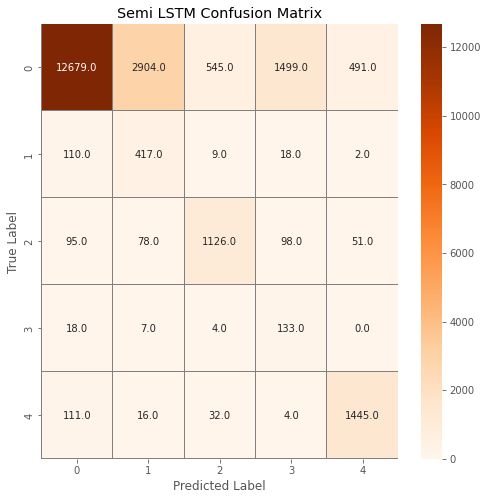

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Semi LSTM Confusion Matrix")
plt.show()

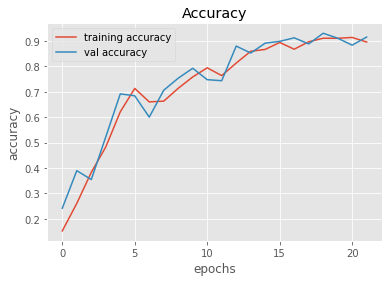

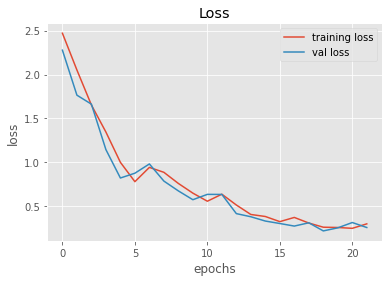

In [97]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
model_sup.summary()

# CNN Model Semi-Supervised

In [98]:
model_CNN_core = Sequential()
#model_LSTM_core.add(Bidirectional(LSTM(units= 187)))
#model_LSTM_core.add(Dropout(0.5))
model_CNN_core.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
model_CNN_core.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
model_CNN_core.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

model_CNN_core.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
model_CNN_core.add(Dropout(0.5))

model_CNN_core.add(Flatten())

In [111]:
from keras.layers.normalization.batch_normalization import BatchNormalization
CNN_model_unsup = Sequential()

CNN_model_unsup.add(keras.Input(shape=(X_train.shape[1],1)))
#model_LSTM.add(Bidirectional(LSTM(units= 187)))
#model_LSTM.add(Dropout(0.5))
CNN_model_unsup.add(model_CNN_core)
CNN_model_unsup.add(Dense(NUM_CLUSTERS, activation='softmax'))
CNN_model_unsup.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_model_unsup.build(input_shape= (10000,186,1))

In [112]:
CNN_model_unsup.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 11904)             47424     
                                                                 
 dense_14 (Dense)            (None, 13)                154765    
                                                                 
Total params: 202,189
Trainable params: 154,765
Non-trainable params: 47,424
_________________________________________________________________


In [113]:
history = CNN_model_unsup.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
history=CNN_model_unsup.fit(clust_xtrain, cat_unlabel, validation_split=0.2, batch_size=256, epochs = 50)

Epoch 1/50
32/32 [==============================] - 0s 12ms/step - loss: 0.3148 - accuracy: 0.9069 - val_loss: 0.3270 - val_accuracy: 0.9045
Epoch 2/50
32/32 [==============================] - 0s 9ms/step - loss: 0.3062 - accuracy: 0.9094 - val_loss: 0.3171 - val_accuracy: 0.9095
Epoch 3/50
32/32 [==============================] - 0s 9ms/step - loss: 0.3016 - accuracy: 0.9081 - val_loss: 0.3104 - val_accuracy: 0.9110
Epoch 4/50
32/32 [==============================] - 0s 9ms/step - loss: 0.2939 - accuracy: 0.9118 - val_loss: 0.3079 - val_accuracy: 0.9115
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 0.2883 - accuracy: 0.9128 - val_loss: 0.3009 - val_accuracy: 0.9130
Epoch 6/50
32/32 [==============================] - 0s 9ms/step - loss: 0.2830 - accuracy: 0.9147 - val_loss: 0.2967 - val_accuracy: 0.9120
Epoch 7/50
32/32 [==============================] - 0s 9ms/step - loss: 0.2808 - accuracy: 0.9134 - val_loss: 0.2919 - val_accuracy: 0.9145
Epoch 8/50
32/32 [=

## CNN Final Classification

In [116]:
CNN_model_sup_core = model_CNN_core

In [117]:
CNN_model_sup_core.trainable=False

In [122]:
CNN_model_sup = Sequential()

CNN_model_sup.add(keras.Input(shape=(X_train.shape[1],1)))
CNN_model_sup.add(CNN_model_sup_core)
CNN_model_sup.add(Dense(10, activation='relu'))
CNN_model_sup.add(Dense(5, activation='softmax'))
CNN_model_sup.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_model_sup.build(input_shape= (10000,186,1))


In [119]:
CNN_model_sup.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 11904)             47424     
                                                                 
 dense_15 (Dense)            (None, 10)                119050    
                                                                 
 dense_16 (Dense)            (None, 5)                 55        
                                                                 
Total params: 166,529
Trainable params: 119,105
Non-trainable params: 47,424
_________________________________________________________________


In [123]:
CNN_sup_history=CNN_model_sup.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs = 30, callbacks=my_callbacks)

Epoch 1/30
391/391 [==============================] - 4s 9ms/step - loss: 0.8072 - accuracy: 0.7181 - val_loss: 0.7959 - val_accuracy: 0.7368
Epoch 2/30
391/391 [==============================] - 3s 8ms/step - loss: 0.5491 - accuracy: 0.8069 - val_loss: 0.6475 - val_accuracy: 0.7760
Epoch 3/30
391/391 [==============================] - 3s 8ms/step - loss: 0.4711 - accuracy: 0.8331 - val_loss: 0.5652 - val_accuracy: 0.8093
Epoch 4/30
391/391 [==============================] - 3s 8ms/step - loss: 0.4302 - accuracy: 0.8461 - val_loss: 0.5798 - val_accuracy: 0.7986
Epoch 5/30
391/391 [==============================] - 3s 8ms/step - loss: 0.4007 - accuracy: 0.8555 - val_loss: 0.5197 - val_accuracy: 0.8184
Epoch 6/30
391/391 [==============================] - 3s 8ms/step - loss: 0.3785 - accuracy: 0.8644 - val_loss: 0.5650 - val_accuracy: 0.7918
Epoch 7/30
391/391 [==============================] - 3s 8ms/step - loss: 0.3629 - accuracy: 0.8693 - val_loss: 0.4831 - val_accuracy: 0.8330
Epoch 

## Evaluation

In [130]:
y_pred = CNN_model_sup.predict(X_test)

In [131]:
loss,accuracy=CNN_model_sup.evaluate(X_test,y_test)

print('Test loss:', loss)

print('Test accuracy:', accuracy)

685/685 [==============================] - 3s 5ms/step - loss: 0.3901 - accuracy: 0.8662
Test loss: 0.39013975858688354
Test accuracy: 0.8662068247795105


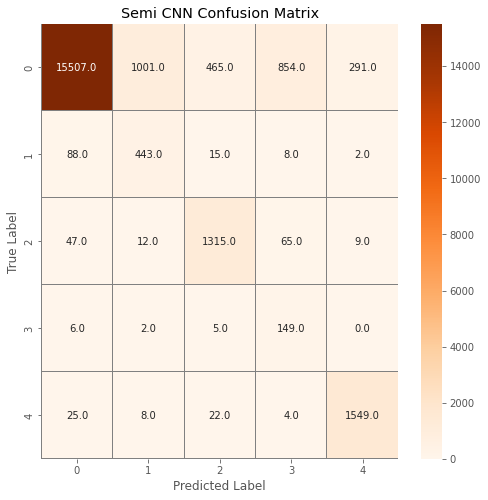

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Oranges",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Semi CNN Confusion Matrix")
plt.show()

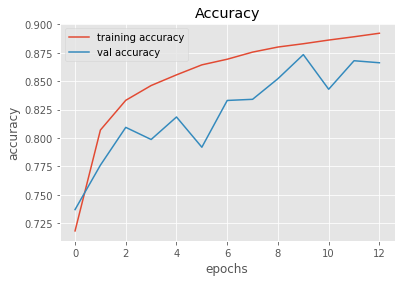

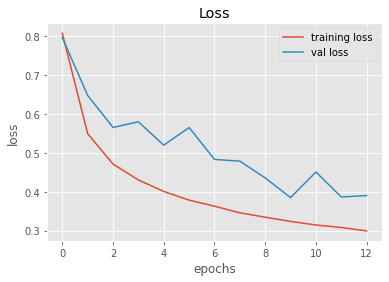

In [127]:
plt.figure(0)

plt.plot(CNN_sup_history.history['accuracy'], label='training accuracy')
plt.plot(CNN_sup_history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(CNN_sup_history.history['loss'], label='training loss')
plt.plot(CNN_sup_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [128]:
CNN_model_sup.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 11904)             47424     
                                                                 
 dense_17 (Dense)            (None, 10)                119050    
                                                                 
 dense_18 (Dense)            (None, 5)                 55        
                                                                 
Total params: 166,529
Trainable params: 119,105
Non-trainable params: 47,424
_________________________________________________________________


# Attention Model

In [131]:
from tensorflow import keras
from tensorflow.keras import layers

In [132]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [133]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(5, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=8,
    ff_dim=8,
    num_transformer_blocks=8,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

#model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()


callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

shuffle_y = np.random.shuffle(y_train)

model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=callbacks,
)

model.evaluate(X_test, y_test, verbose=1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_32 (InputLayer)          [(None, 186, 1)]     0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 186, 1)      2           ['input_32[0][0]']               
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 186, 1)      14337       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              